# Change Point Index Creator and Day Splitter

In [2]:
import pandas as pd
import os
import sys
sys.path.append("..")

os.chdir("..")
# List all CSV files in the data/raw directory
csv_files = [f for f in os.listdir('data/raw') if f.endswith('.csv')]

# ,date,sender_id,bgl,bgl_date_millis,text,template,msg_type,affects_fob,affects_iob,dose_units,food_g,food_glycemic_index,dose_automatic,fp_bgl,message_basal_change,__typename,trend
# Define the columns to load
columns_to_load = ['date', 'bgl', 'msg_type', 'affects_fob', 'affects_iob','dose_units','food_g','food_glycemic_index']

# Load each CSV file into a DataFrame and store them in a dictionary
dataframes = {file: pd.read_csv(os.path.join('data/raw', file), usecols=columns_to_load, parse_dates=['date']) for file in csv_files}

# Print the names of the loaded DataFrames
print("Loaded DataFrames:", list(dataframes.keys()))

Loaded DataFrames: ['500030_2024-07-01_2024-09-30.csv', '679372_2024-07-01_2024-09-30.csv']


In [3]:
cr_df = dataframes['679372_2024-07-01_2024-09-30.csv']
cr_df.head()

,date,bgl,msg_type,affects_fob,affects_iob,dose_units,food_g,food_glycemic_index
0,2024-07-01 00:02:32-04:00,115.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-07-01 00:05:33-04:00,112.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-07-01 00:08:33-04:00,116.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-07-01 00:10:34-04:00,121.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-07-01 00:13:36-04:00,122.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cr_df[cr_df['msg_type'] == 'ANNOUNCE_MEAL']

,date,bgl,msg_type,affects_fob,affects_iob,dose_units,food_g,food_glycemic_index
256,2024-07-01 13:39:01.062000-04:00,135.0,ANNOUNCE_MEAL,True,False,0.0,22.0,0.5
275,2024-07-01 14:32:31.740000-04:00,157.0,ANNOUNCE_MEAL,True,False,0.0,22.0,0.5
308,2024-07-01 15:44:35.026000-04:00,223.0,ANNOUNCE_MEAL,True,False,0.0,22.0,0.5
718,2024-07-02 13:19:08.176000-04:00,102.0,ANNOUNCE_MEAL,True,False,0.0,40.0,0.5
849,2024-07-02 20:12:00.212000-04:00,97.0,ANNOUNCE_MEAL,True,False,NaN,15.0,0.5
...,...,...,...,...,...,...,...,...
39619,2024-09-29 20:44:47.993000-04:00,69.0,ANNOUNCE_MEAL,True,False,NaN,12.0,0.5
39620,2024-09-29 20:46:03.006000-04:00,69.0,ANNOUNCE_MEAL,True,False,NaN,6.0,0.5
39641,2024-09-29 21:32:43.092000-04:00,89.0,ANNOUNCE_MEAL,True,False,NaN,6.0,0.5
39920,2024-09-30 14:18:29.569000-04:00,132.0,ANNOUNCE_MEAL,True,False,NaN,10.0,0.5


In [5]:
cr_df = cr_df.set_index('date').squeeze()
cr_df.index = pd.DatetimeIndex(cr_df.index)

In [6]:
meal_annoucements_df = cr_df[cr_df['msg_type'] == 'ANNOUNCE_MEAL']
meal_annoucements_df


,bgl,msg_type,affects_fob,affects_iob,dose_units,food_g,food_glycemic_index
date,,,,,,,
2024-07-01 13:39:01.062000-04:00,135.0,ANNOUNCE_MEAL,True,False,0.0,22.0,0.5
2024-07-01 14:32:31.740000-04:00,157.0,ANNOUNCE_MEAL,True,False,0.0,22.0,0.5
2024-07-01 15:44:35.026000-04:00,223.0,ANNOUNCE_MEAL,True,False,0.0,22.0,0.5
2024-07-02 13:19:08.176000-04:00,102.0,ANNOUNCE_MEAL,True,False,0.0,40.0,0.5
2024-07-02 20:12:00.212000-04:00,97.0,ANNOUNCE_MEAL,True,False,NaN,15.0,0.5
...,...,...,...,...,...,...,...
2024-09-29 20:44:47.993000-04:00,69.0,ANNOUNCE_MEAL,True,False,NaN,12.0,0.5
2024-09-29 20:46:03.006000-04:00,69.0,ANNOUNCE_MEAL,True,False,NaN,6.0,0.5
2024-09-29 21:32:43.092000-04:00,89.0,ANNOUNCE_MEAL,True,False,NaN,6.0,0.5


In [7]:
meal_annoucements_df = meal_annoucements_df.resample('5min').first()
meal_annoucements_df

,bgl,msg_type,affects_fob,affects_iob,dose_units,food_g,food_glycemic_index
date,,,,,,,
2024-07-01 13:35:00-04:00,135.0,ANNOUNCE_MEAL,True,False,0.0,22.0,0.5
2024-07-01 13:40:00-04:00,NaN,None,None,None,NaN,NaN,NaN
2024-07-01 13:45:00-04:00,NaN,None,None,None,NaN,NaN,NaN
2024-07-01 13:50:00-04:00,NaN,None,None,None,NaN,NaN,NaN
2024-07-01 13:55:00-04:00,NaN,None,None,None,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-09-30 17:45:00-04:00,NaN,None,None,None,NaN,NaN,NaN
2024-09-30 17:50:00-04:00,NaN,None,None,None,NaN,NaN,NaN
2024-09-30 17:55:00-04:00,NaN,None,None,None,NaN,NaN,NaN


In [8]:
meal_annoucements_df = meal_annoucements_df[meal_annoucements_df['msg_type'] == 'ANNOUNCE_MEAL']
meal_annoucements_df

,bgl,msg_type,affects_fob,affects_iob,dose_units,food_g,food_glycemic_index
date,,,,,,,
2024-07-01 13:35:00-04:00,135.0,ANNOUNCE_MEAL,True,False,0.0,22.0,0.5
2024-07-01 14:30:00-04:00,157.0,ANNOUNCE_MEAL,True,False,0.0,22.0,0.5
2024-07-01 15:40:00-04:00,223.0,ANNOUNCE_MEAL,True,False,0.0,22.0,0.5
2024-07-02 13:15:00-04:00,102.0,ANNOUNCE_MEAL,True,False,0.0,40.0,0.5
2024-07-02 20:10:00-04:00,97.0,ANNOUNCE_MEAL,True,False,NaN,15.0,0.5
...,...,...,...,...,...,...,...
2024-09-29 20:40:00-04:00,71.0,ANNOUNCE_MEAL,True,False,NaN,6.0,0.5
2024-09-29 20:45:00-04:00,69.0,ANNOUNCE_MEAL,True,False,NaN,6.0,0.5
2024-09-29 21:30:00-04:00,89.0,ANNOUNCE_MEAL,True,False,NaN,6.0,0.5


In [9]:
non_meal_df = cr_df[cr_df['msg_type'] != 'ANNOUNCE_MEAL']
non_meal_df = non_meal_df.resample('5min').first()

cr_resampled = non_meal_df.join(meal_annoucements_df, how='left', rsuffix='_meal')

print(cr_resampled[cr_resampled['msg_type_meal'] == 'ANNOUNCE_MEAL'])


                             bgl      msg_type affects_fob affects_iob  \
date                                                                     
2024-07-01 13:35:00-04:00  135.0  DOSE_INSULIN       False        True   
2024-07-01 14:30:00-04:00  157.0          None        None        None   
2024-07-01 15:40:00-04:00  223.0          None        None        None   
2024-07-02 13:15:00-04:00  102.0          None        None        None   
2024-07-02 20:10:00-04:00   97.0  DOSE_INSULIN       False        True   
...                          ...           ...         ...         ...   
2024-09-29 20:40:00-04:00   71.0          None        None        None   
2024-09-29 20:45:00-04:00   68.0          None        None        None   
2024-09-29 21:30:00-04:00   89.0          None        None        None   
2024-09-30 14:15:00-04:00  132.0  DOSE_INSULIN       False        True   
2024-09-30 18:05:00-04:00   92.0          None        None        None   

                           dose_units

In [10]:
cr_resampled.loc['2024-07-01 14:30:00-04:05']

bgl                         159.0
msg_type                     None
affects_fob                  None
affects_iob                  None
dose_units                    NaN
food_g                        NaN
food_glycemic_index           NaN
bgl_meal                      NaN
msg_type_meal                 NaN
affects_fob_meal              NaN
affects_iob_meal              NaN
dose_units_meal               NaN
food_g_meal                   NaN
food_glycemic_index_meal      NaN
Name: 2024-07-01 14:35:00-04:00, dtype: object

In [11]:
# Create the new 'bgl' column
cr_resampled['bgl'] = cr_resampled['bgl_meal'].combine_first(cr_resampled['bgl'])

# Drop the 'bgl_meal' column if it's no longer needed
cr_resampled.drop(columns=['bgl_meal'], inplace=True)

# Display the updated DataFrame
print(cr_resampled)

                             bgl msg_type affects_fob affects_iob  dose_units  \
date                                                                            
2024-07-01 00:00:00-04:00  115.0     None        None        None         NaN   
2024-07-01 00:05:00-04:00  112.0     None        None        None         NaN   
2024-07-01 00:10:00-04:00  121.0     None        None        None         NaN   
2024-07-01 00:15:00-04:00  118.0     None        None        None         NaN   
2024-07-01 00:20:00-04:00  115.0     None        None        None         NaN   
...                          ...      ...         ...         ...         ...   
2024-09-30 23:35:00-04:00  113.0     None        None        None         NaN   
2024-09-30 23:40:00-04:00  112.0     None        None        None         NaN   
2024-09-30 23:45:00-04:00  101.0     None        None        None         NaN   
2024-09-30 23:50:00-04:00   96.0     None        None        None         NaN   
2024-09-30 23:55:00-04:00  1

In [12]:
# Iterate through the DataFrame and update the 'msg_type_meal' column
for idx in meal_annoucements_df.index:
    if meal_annoucements_df.at[idx, 'msg_type'] == 'ANNOUNCE_MEAL':

        end_time = idx + pd.Timedelta(hours=2)
        if end_time in cr_resampled.index:
            cr_resampled.at[idx, 'msg_type'] = 'ANNOUNCE_MEAL'
            cr_resampled.at[end_time, 'msg_type'] = 'MEAL_END'

# Display the updated DataFrame
print(cr_resampled)

                             bgl msg_type affects_fob affects_iob  dose_units  \
date                                                                            
2024-07-01 00:00:00-04:00  115.0     None        None        None         NaN   
2024-07-01 00:05:00-04:00  112.0     None        None        None         NaN   
2024-07-01 00:10:00-04:00  121.0     None        None        None         NaN   
2024-07-01 00:15:00-04:00  118.0     None        None        None         NaN   
2024-07-01 00:20:00-04:00  115.0     None        None        None         NaN   
...                          ...      ...         ...         ...         ...   
2024-09-30 23:35:00-04:00  113.0     None        None        None         NaN   
2024-09-30 23:40:00-04:00  112.0     None        None        None         NaN   
2024-09-30 23:45:00-04:00  101.0     None        None        None         NaN   
2024-09-30 23:50:00-04:00   96.0     None        None        None         NaN   
2024-09-30 23:55:00-04:00  1

In [13]:
cr_resampled.loc['2024-07-02 20:10:00-04:00']

bgl                                  97.0
msg_type                    ANNOUNCE_MEAL
affects_fob                         False
affects_iob                          True
dose_units                            1.0
food_g                                NaN
food_glycemic_index                   NaN
msg_type_meal               ANNOUNCE_MEAL
affects_fob_meal                     True
affects_iob_meal                    False
dose_units_meal                       NaN
food_g_meal                          15.0
food_glycemic_index_meal              0.5
Name: 2024-07-02 20:10:00-04:00, dtype: object

In [14]:
timezone = cr_resampled.index.tz
print(f"Timezone: {timezone}")

Timezone: UTC-04:00


In [15]:
cr_resampled['adjusted_date'] = cr_resampled.index - pd.Timedelta(hours=4)
cr_resampled['day_4am'] = cr_resampled['adjusted_date'].dt.date
print(cr_resampled['day_4am'][:400])

date
2024-07-01 00:00:00-04:00    2024-06-30
2024-07-01 00:05:00-04:00    2024-06-30
2024-07-01 00:10:00-04:00    2024-06-30
2024-07-01 00:15:00-04:00    2024-06-30
2024-07-01 00:20:00-04:00    2024-06-30
                                ...    
2024-07-02 08:55:00-04:00    2024-07-02
2024-07-02 09:00:00-04:00    2024-07-02
2024-07-02 09:05:00-04:00    2024-07-02
2024-07-02 09:10:00-04:00    2024-07-02
2024-07-02 09:15:00-04:00    2024-07-02
Freq: 5min, Name: day_4am, Length: 400, dtype: object


In [16]:
cr_resampled = cr_resampled.drop(columns=['affects_fob', 'affects_iob', 'food_glycemic_index', 'adjusted_date', 'msg_type_meal','affects_iob_meal', 'dose_units_meal', 'food_g_meal', 'affects_fob_meal','food_glycemic_index_meal'])

In [17]:
grouped = cr_resampled.groupby('day_4am')
for day, group in grouped:

    if len(group) < 288:
        print(f"Day: {day}")
        print(len(group))

Day: 2024-06-30
48
Day: 2024-09-30
240


In [18]:
from datetime import datetime
cr_resampled['day_4am'] = pd.to_datetime(cr_resampled['day_4am'])
condition1 = cr_resampled['day_4am'] == pd.Timestamp(datetime(2024, 9, 30))
condition2 = cr_resampled['day_4am'] == pd.Timestamp(datetime(2024, 6, 30))
condition = condition1 | condition2
condition

date
2024-07-01 00:00:00-04:00    True
2024-07-01 00:05:00-04:00    True
2024-07-01 00:10:00-04:00    True
2024-07-01 00:15:00-04:00    True
2024-07-01 00:20:00-04:00    True
                             ... 
2024-09-30 23:35:00-04:00    True
2024-09-30 23:40:00-04:00    True
2024-09-30 23:45:00-04:00    True
2024-09-30 23:50:00-04:00    True
2024-09-30 23:55:00-04:00    True
Freq: 5min, Name: day_4am, Length: 26496, dtype: bool

In [19]:
# Drop rows based on the combined condition
cr_resampled_filtered = cr_resampled.drop(cr_resampled[condition].index)

# Print the resulting DataFrame
print(cr_resampled_filtered)

                             bgl msg_type  dose_units  food_g    day_4am
date                                                                    
2024-07-01 04:00:00-04:00  112.0     None         NaN     NaN 2024-07-01
2024-07-01 04:05:00-04:00  106.0     None         NaN     NaN 2024-07-01
2024-07-01 04:10:00-04:00  105.0     None         NaN     NaN 2024-07-01
2024-07-01 04:15:00-04:00  107.0     None         NaN     NaN 2024-07-01
2024-07-01 04:20:00-04:00  107.0     None         NaN     NaN 2024-07-01
...                          ...      ...         ...     ...        ...
2024-09-30 03:35:00-04:00  129.0     None         NaN     NaN 2024-09-29
2024-09-30 03:40:00-04:00  118.0     None         NaN     NaN 2024-09-29
2024-09-30 03:45:00-04:00  122.0     None         NaN     NaN 2024-09-29
2024-09-30 03:50:00-04:00  126.0     None         NaN     NaN 2024-09-29
2024-09-30 03:55:00-04:00  133.0     None         NaN     NaN 2024-09-29

[26208 rows x 5 columns]


In [20]:
cr_resampled_filtered.index

DatetimeIndex(['2024-07-01 04:00:00-04:00', '2024-07-01 04:05:00-04:00',
               '2024-07-01 04:10:00-04:00', '2024-07-01 04:15:00-04:00',
               '2024-07-01 04:20:00-04:00', '2024-07-01 04:25:00-04:00',
               '2024-07-01 04:30:00-04:00', '2024-07-01 04:35:00-04:00',
               '2024-07-01 04:40:00-04:00', '2024-07-01 04:45:00-04:00',
               ...
               '2024-09-30 03:10:00-04:00', '2024-09-30 03:15:00-04:00',
               '2024-09-30 03:20:00-04:00', '2024-09-30 03:25:00-04:00',
               '2024-09-30 03:30:00-04:00', '2024-09-30 03:35:00-04:00',
               '2024-09-30 03:40:00-04:00', '2024-09-30 03:45:00-04:00',
               '2024-09-30 03:50:00-04:00', '2024-09-30 03:55:00-04:00'],
              dtype='datetime64[ns, UTC-04:00]', name='date', length=26208, freq=None)

In [21]:
# Assuming cr_resampled_filtered is your DataFrame

# Create a new integer index starting at 0
new_index = pd.RangeIndex(start=0, stop=len(cr_resampled_filtered), step=1, dtype='int32')

# Set the new integer index to the DataFrame
cr_resampled_filtered.index = new_index

# Now the index is an integer index starting at 0 and of type int32
print(cr_resampled_filtered.index)

cr_resampled_filtered.to_csv('data/interim/meal_annotation_plus_2hr_meal.csv', index=True)

RangeIndex(start=0, stop=26208, step=1)


Create first week as a subset.

In [22]:
three_days = cr_resampled_filtered[:288*7]

In [23]:
ts = three_days['bgl']
ts

0       112.0
1       106.0
2       105.0
3       107.0
4       107.0
        ...  
2011    130.0
2012    130.0
2013    130.0
2014    132.0
2015    139.0
Name: bgl, Length: 2016, dtype: float64

In [24]:
condition1 = three_days['msg_type'] == 'MEAL_END'
condition2 = three_days['msg_type'] == 'ANNOUNCE_MEAL'
condition = condition1 | condition2
true_cps = ts[condition].index
true_cps

Index([ 115,  126,  139,  140,  150,  164,  399,  423,  482,  503,  506,  527,
        646,  670,  698,  722,  757,  771,  781,  795, 1025, 1028, 1049, 1052,
       1218, 1221, 1242, 1245, 1267, 1291, 1593, 1617, 1659, 1683, 1881, 1901,
       1905, 1925],
      dtype='int64')

In [25]:
import sys

sys.path.insert(0, "..")

import pandas as pd
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

from sktime.annotation.clasp import ClaSPSegmentation, find_dominant_window_sizes
from sktime.annotation.plotting.utils import (
    plot_time_series_with_change_points,
    plot_time_series_with_profiles,
)
from sktime.datasets import load_electric_devices_segmentation

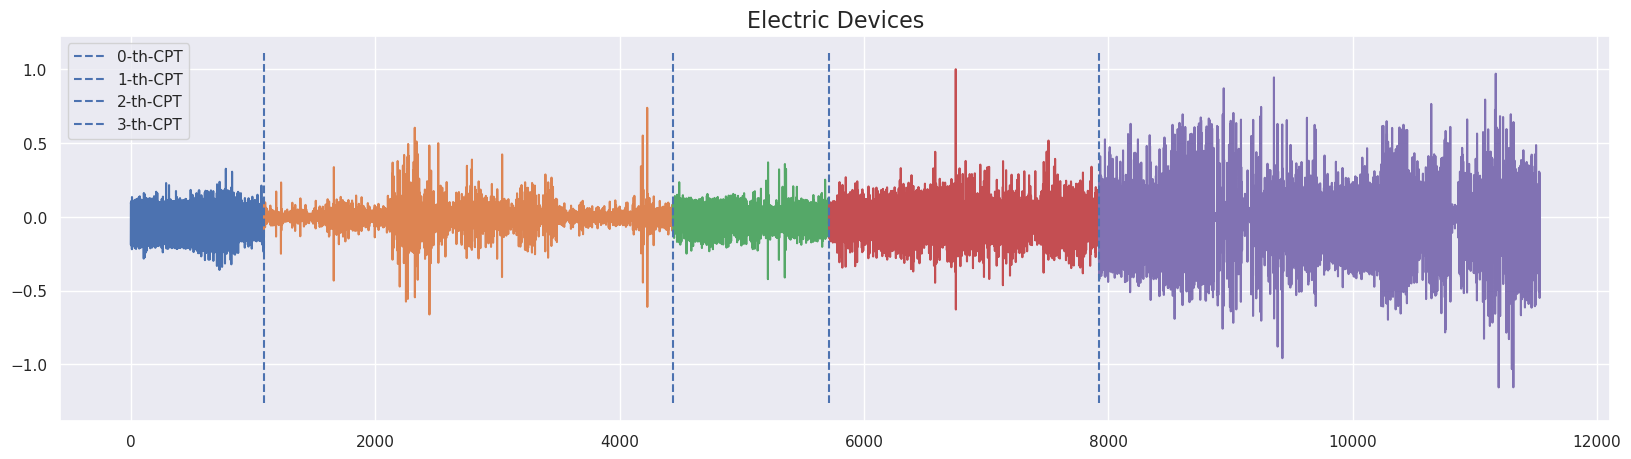

In [26]:
ts_ex, period_size_ex, true_cps_ex = load_electric_devices_segmentation()
_ = plot_time_series_with_change_points("Electric Devices", ts_ex, true_cps_ex)


Imagine 
- first thing in the morning log your breakfast...
- make this work for every meal (blank in gluroo event log in your feed)
- With expected time of breakfast.
- User specific expected meal time windows...

In [27]:
ts_ex

1       -0.187086
2        0.098119
3        0.088967
4        0.107328
5       -0.193514
           ...   
11528    0.300240
11529    0.200745
11530   -0.548908
11531    0.274886
11532    0.274022
Name: 1, Length: 11532, dtype: float64

In [28]:
true_cps_ex

array([1090, 4436, 5712, 7923], dtype=int32)

In [29]:
ts

0       112.0
1       106.0
2       105.0
3       107.0
4       107.0
        ...  
2011    130.0
2012    130.0
2013    130.0
2014    132.0
2015    139.0
Name: bgl, Length: 2016, dtype: float64

In [30]:
true_cps

Index([ 115,  126,  139,  140,  150,  164,  399,  423,  482,  503,  506,  527,
        646,  670,  698,  722,  757,  771,  781,  795, 1025, 1028, 1049, 1052,
       1218, 1221, 1242, 1245, 1267, 1291, 1593, 1617, 1659, 1683, 1881, 1901,
       1905, 1925],
      dtype='int64')

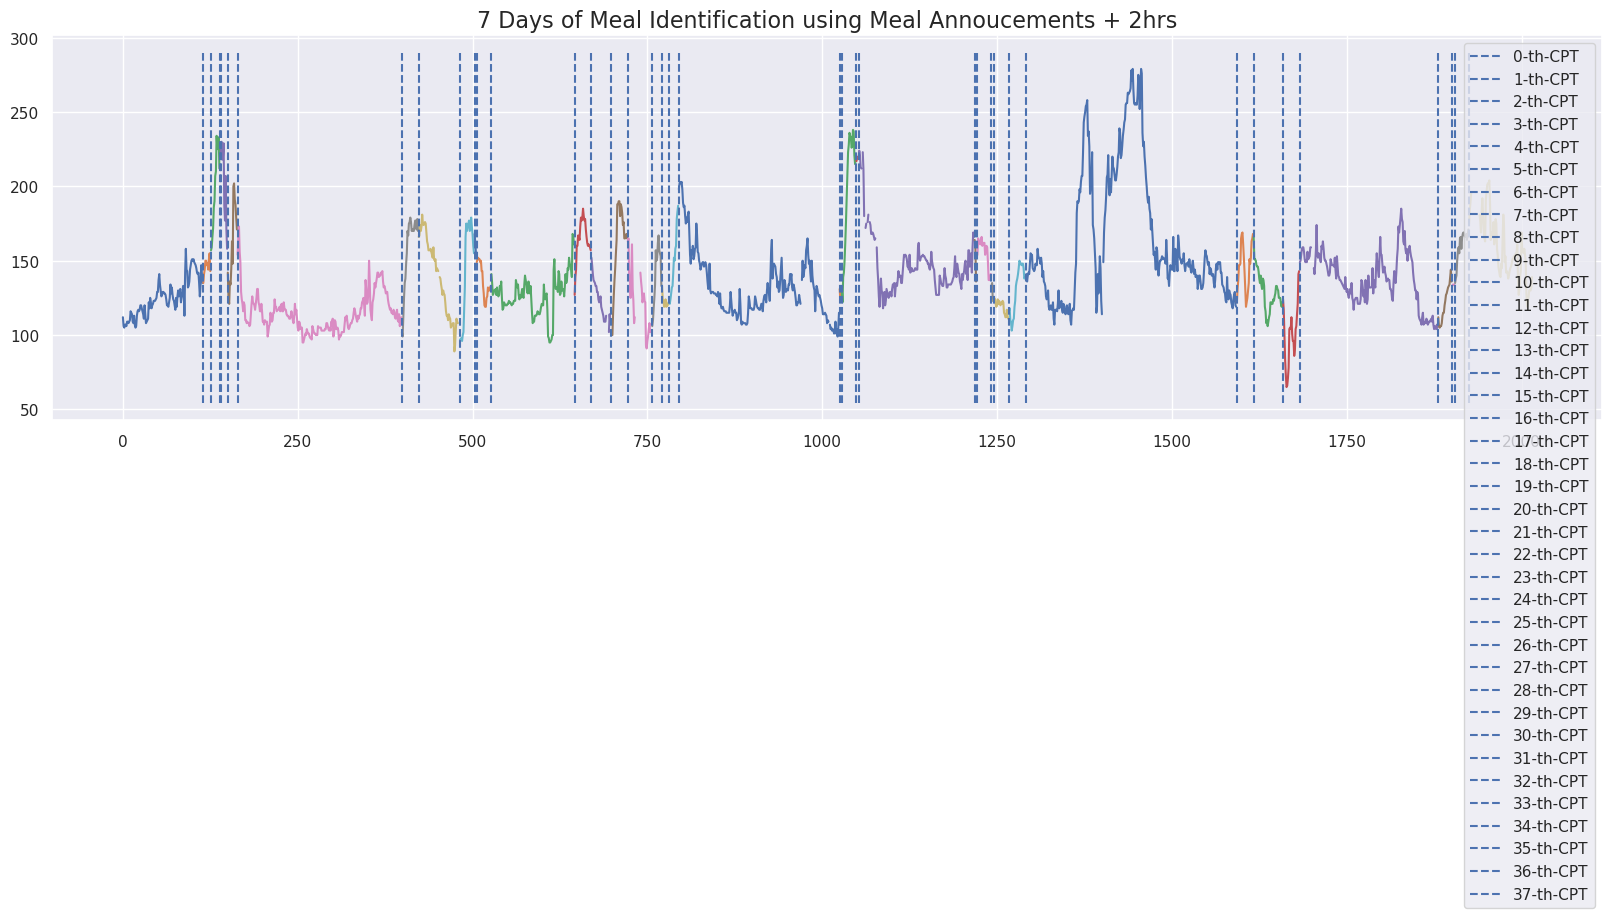

In [31]:
_ = plot_time_series_with_change_points("7 Days of Meal Identification using Meal Annoucements + 2hrs", ts, true_cps)

In [32]:
ts_ex

1       -0.187086
2        0.098119
3        0.088967
4        0.107328
5       -0.193514
           ...   
11528    0.300240
11529    0.200745
11530   -0.548908
11531    0.274886
11532    0.274022
Name: 1, Length: 11532, dtype: float64

In [33]:
period_size_ex

10

In [34]:
true_cps_ex

array([1090, 4436, 5712, 7923], dtype=int32)

In [35]:
clasp = ClaSPSegmentation(period_length=period_size_ex, n_cps=5)
found_cps = clasp.fit_predict(ts_ex)
profiles = clasp.profiles
scores = clasp.scores
print("The found change points are", found_cps.to_numpy())

The found change points are [1038 4525 5719 7883]


In [251]:
import pandas as pd
import os
import sys
from datetime import datetime

def dataset_creator(raw_data_path='0_meal_identification/meal_identification/data/raw',
                    output_dir='0_meal_identification/meal_identification/data/interim',
                    use_auto_label=True,
                    keep_cols=['date', 'bgl', 'msg_type', 'affects_fob', 'affects_iob','dose_units','food_g','food_glycemic_index'],
                    day_start_index_change=True,
                    day_start_time=pd.Timedelta(hours=4),
                    min_carbs=10,
                    n_top_carb_meals=3,
                    meal_length=pd.Timedelta(hours=3),
                    erase_meal_overlap=True,
                    coerce_time=True,
                    coerse_time_interval=pd.Timedelta(minutes=5),
                    use_bolus_for_meal_start=False,
                    return_data=False,
                    ):
    """
    Create a dataset from the raw data.

    Parameters
    ----------
    raw_data_path : str, optional
        Path to the directory containing raw data files (default is 'data/raw').
    output_dir : str, optional
        Directory to save the processed dataset (default is 'data/interm').
    keep_cols : list of str, optional
        List of columns to keep from the raw data (default is ['date', 'bgl', 'msg_type', 'affects_fob', 'affects_iob', 'dose_units', 'food_g', 'food_glycemic_index']).
    day_start_index_change : bool, optional
        Whether to create a day index starting at a specific time (default is True).
    day_start_time : pd.Timedelta, optional
        The time of day to start the day index (default is pd.Timedelta(hours=4)).
    min_carbs : int, optional
        Minimum amount of carbohydrates to consider a meal (default is 10).
    top_carb_meals : int, optional
        Number of top carbohydrate meals to consider per day, keeps the 'n' largest aggregated meals (default is 3).
    meal_length : pd.Timedelta, optional
        Duration of a meal (default is pd.Timedelta(hours=3)).
    erase_meal_overlap : bool, optional
        Whether to erase overlapping meals (default is True).
    coerce_time : bool, optional
        Whether to use coarse time intervals (default is True).
    coerse_time_interval : pd.Timedelta, optional
        Interval for coarse time (default is pd.Timedelta(minutes=5)).
    use_bolus_for_meal_start : bool, optional
        Whether to use bolus for determining meal start (default is False).

    Returns
    -------
    None
        The function processes the raw data and saves the dataset to the specified output directory.
    """

    def get_root_dir(current_dir=None):
        """
        Get the root directory of the project by looking for a 'bg_control' directory.

        Parameters
        ----------
        current_dir : str, optional
            The starting directory to search from. If None, uses the current working directory.

        Returns
        -------
        str
            The root directory of the project.
        """
        if current_dir is None:
            current_dir = os.getcwd()

        while current_dir != os.path.dirname(current_dir):
            if os.path.basename(current_dir) == 'bg_control':
                return current_dir
            current_dir = os.path.dirname(current_dir)

        raise FileNotFoundError("Project root directory 'bg_control' not found.")

    def load_data(raw_data_path, keep_cols):
        """
        Load data from the raw data path.

        Parameters
        ----------
        raw_data_path : str
            Path to the directory containing raw data files.
        keep_cols : list of str
            List of columns to keep from the raw data.

        Returns
        -------
        dict
            A dictionary of DataFrames loaded from the raw data files.
        """
        project_root = get_root_dir()
        print(project_root)
        full_raw_loc_path = os.path.join(project_root, raw_data_path)
        print(full_raw_loc_path)
        csv_files = [f for f in os.listdir(full_raw_loc_path) if f.endswith('.csv')]
        columns_to_load = keep_cols

        # Load each CSV file into a DataFrame and store them in a dictionary
        dataframes = {file: pd.read_csv(os.path.join(full_raw_loc_path, file), usecols=columns_to_load, parse_dates=['date']) for file in csv_files}
        print("Loaded DataFrames:", list(dataframes.keys()))

        return dataframes

    def save_data(data,
                  output_dir='0_meal_identification/meal_identification/data/interim',
                  data_label='dataLabelUnspecified_',
                  patient_id='idUnspecified_',
                  data_gen_date=datetime.today().strftime('%Y-%m-%d'),
                  inclue_gen_date_label=True):
        '''
        Save the data to the output directory
        '''
        project_root = get_root_dir()
        print(f"Project root: {project_root}")
        full_out_path_dir = os.path.join(project_root, output_dir)
        if inclue_gen_date_label:
            data.to_csv(os.path.join(full_out_path_dir, f"{data_gen_date}_{patient_id}_{data_label}.csv"), index=True)
            print(f"Data saved successfully in: {output_dir}")
            print(f"\n \t Dataset label: {data_gen_date}_{patient_id}__{data_label}")
        else:
            data.to_csv(os.path.join(full_out_path_dir, f"{patient_id}_{data_label}.csv"), index=True)
            print(f"Data saved successfully in: {output_dir}")
            print(f"\n \t Dataset label: {patient_id}_{data_label}")

    def dataset_label_modifier_fn(base_label_modifer, coerce_time, coerce_time_label, day_start_index_change, day_start_time_label, erase_meal_overlap, erase_meal_label):
        '''
        Modify the data label
        '''
        data_label_modifer = base_label_modifer
        if coerce_time:
            data_label_modifer = data_label_modifer + coerce_time_label
        if day_start_index_change:
            data_label_modifer = data_label_modifer + day_start_time_label
        if erase_meal_overlap:
            data_label_modifer = data_label_modifer + erase_meal_label

        return data_label_modifer

    def coerce_time_fn(data, coerse_time_interval):
        '''
        Coerce the time interval of the data
        '''
        data = data.set_index('date').squeeze()
        data.index = pd.DatetimeIndex(data.index)
        data = data.resample(coerse_time_interval).first()

        meal_annoucements_df = data[data['msg_type'] == 'ANNOUNCE_MEAL']
        meal_annoucements_df = meal_annoucements_df.resample('5min').first()
        non_meal_df = data[data['msg_type'] != 'ANNOUNCE_MEAL']
        non_meal_df = non_meal_df.resample('5min').first()

        data_resampled = non_meal_df.join(meal_annoucements_df, how='left', rsuffix='_meal')
        data_resampled['bgl'] = data_resampled['bgl_meal'].combine_first(data_resampled['bgl'])
        data_resampled['msg_type'] = data_resampled['msg_type_meal'].combine_first(data_resampled['msg_type'])
        data_resampled['food_g'] = data_resampled['food_g_meal'].combine_first(data_resampled['food_g'])
        data_resampled['food_g_keep'] = data_resampled['food_g_meal']
        # Identify columns that end with '_meal'
        columns_to_drop = data_resampled.filter(regex='_meal$').columns

        # Drop the identified columns
        data_resampled = data_resampled.drop(columns=columns_to_drop)
        return data_resampled

    def erase_meal_overlap_fn(patient_df, meal_length, min_carbs):
        """
        Process the DataFrame to handle meal overlaps.

        Parameters
        ----------
        df : pd.DataFrame
            The input DataFrame with columns 'msg_type', 'food_g', and a datetime index.
        meal_length : pd.Timedelta
            The duration to look ahead for meal events.

        Returns
        -------
        pd.DataFrame
            The processed DataFrame with meal overlaps handled.
        """

        announce_meal_indices = patient_df[patient_df['msg_type'] == 'ANNOUNCE_MEAL'].index
        patient_df[patient_df['msg_type'] == 'ANNOUNCE_MEAL']

        for idx in announce_meal_indices:
            # We do not want to consider meals that are less than the minimum carbs
            #   min carbs are okay if they are rolled into a larger meal, but they should
            #   not count as the start of a meal.
            if patient_df.at[idx, 'food_g'] <= min_carbs:
            #     skipped_meals += 1
            #     print(f"Skipping meal at {idx} with {patient_df.at[idx, 'food_g']}g of carbs")
                 continue
            # else:
            #     print(f"Processing meal at {idx} with {patient_df.at[idx, 'food_g']}g of carbs")
            # Define the time window
            window_end = idx + meal_length

            # Get the events within the time window
            window_events = patient_df.loc[idx+pd.Timedelta(1):window_end]

            # Sum the 'food_g' counts greater than 0 within the window
            food_g_sum = window_events[window_events['food_g'] > 0]['food_g'].sum()

            # Add the sum to the original 'ANNOUNCE_MEAL' event
            patient_df.at[idx, 'food_g'] += food_g_sum

            # Erase the other events that fell within the window
            patient_df.loc[window_events.index[:], 'food_g'] = 0
            patient_df.loc[window_events.index[:], 'msg_type'] = ''

        return patient_df

    def keep_top_n_carb_meals(patient_df, n_top_carb_meals):
        """
        Keep only the top n carbohydrate meals per day in the DataFrame.

        Parameters
        ----------
        df : pd.DataFrame
            The input DataFrame with columns 'msg_type', 'food_g', and a datetime index.
        n_top_carb_meals : int
            The number of top carbohydrate meals to keep per day.

        Returns
        -------
        pd.DataFrame
            The processed DataFrame with only the top n carbohydrate meals per day.
        """
        # Filter the DataFrame to include only 'ANNOUNCE_MEAL' events
        announce_meal_df = patient_df[patient_df['msg_type'] == 'ANNOUNCE_MEAL']

        # Group by date
        #announce_meal_df['date'] = announce_meal_df.index.date
        grouped = announce_meal_df.groupby('day_start_shift')
        # Initialize a list to store the indices of the top n meals
        top_meal_indices = []

        for date, group in grouped:
            # Sort the group by 'food_g' in descending order and keep the top n meals
            top_meals = group.nlargest(n_top_carb_meals, 'food_g')
            #print(top_meals)
            top_meal_indices.extend(top_meals.index)

        print(top_meal_indices)

        # Set the 'food_g' values of the other meals to 0
        patient_df.loc[~patient_df.index.isin(top_meal_indices) & (patient_df['msg_type'] == 'ANNOUNCE_MEAL'), 'food_g'] = 0
        patient_df.loc[~patient_df.index.isin(top_meal_indices) & (patient_df['msg_type'] == 'ANNOUNCE_MEAL'), 'msg_type'] = '0'
        return patient_df


    patient_dfs_dict = load_data(raw_data_path=raw_data_path, keep_cols=keep_cols)

    if return_data:
        patient_dfs_list = []

    for patient_key in patient_dfs_dict.keys():
        print(f"\n========================= \nProcessing: {patient_key[:6]}")
        #try:
        patient_df = patient_dfs_dict[patient_key]

        if coerce_time:
            patient_df = coerce_time_fn(data=patient_df, coerse_time_interval=coerse_time_interval)

        if day_start_index_change:
            adjusted_date = patient_df.index - day_start_time
            patient_df['day_start_shift'] = adjusted_date.date

        if erase_meal_overlap:
            print(f"Erasing meal overlap with minCarb{min_carbs}g and {meal_length.components.hours}hr meal window")
            patient_df = erase_meal_overlap_fn(patient_df, meal_length, min_carbs)

        if n_top_carb_meals != -1:
            patient_df = keep_top_n_carb_meals(patient_df, n_top_carb_meals=n_top_carb_meals)

        if use_auto_label:
            save_data(data=patient_df,
                      data_label=dataset_label_modifier_fn(base_label_modifer=''
                                                           , coerce_time=coerce_time
                                                           , coerce_time_label='timeInter'+str(coerse_time_interval.components.minutes)+'mins_'
                                                           , day_start_index_change=day_start_index_change
                                                           , day_start_time_label="dayStart"+str(day_start_time.components.hours)+"hrs_"
                                                           , erase_meal_overlap=erase_meal_overlap
                                                           , erase_meal_label='minCarb'+str(min_carbs)+'g_'+str(meal_length.components.hours)+'hrMealW'
                                                           ),
                      patient_id=patient_key[:7])
            patient_dfs_list.append(patient_df)
        else:
            save_data(data=patient_df, patient_id=patient_key[:7])
            patient_dfs_list.append(patient_df)
        #except:
            #print(f"Error processing: {patient_key[:6]} data processing likely unsucessful.")

    print(f"\n\n All data saved successfully in: {output_dir}")

    return patient_dfs_list

In [252]:
result_df = dataset_creator(return_data=True)
walker_df = result_df[0]

/home/cjrisi/Projects/bg_control
/home/cjrisi/Projects/bg_control/0_meal_identification/meal_identification/data/raw
Loaded DataFrames: ['500030_2024-07-01_2024-09-30.csv', '679372_2024-07-01_2024-09-30.csv']

Processing: 500030
Erasing meal overlap with minCarb10g and 3hr meal window
[Timestamp('2024-07-01 13:55:00-0500', tz='UTC-05:00'), Timestamp('2024-07-01 20:35:00-0500', tz='UTC-05:00'), Timestamp('2024-07-02 02:45:00-0500', tz='UTC-05:00'), Timestamp('2024-07-02 20:15:00-0500', tz='UTC-05:00'), Timestamp('2024-07-02 10:05:00-0500', tz='UTC-05:00'), Timestamp('2024-07-02 13:25:00-0500', tz='UTC-05:00'), Timestamp('2024-07-03 10:15:00-0500', tz='UTC-05:00'), Timestamp('2024-07-03 18:05:00-0500', tz='UTC-05:00'), Timestamp('2024-07-03 22:50:00-0500', tz='UTC-05:00'), Timestamp('2024-07-04 17:20:00-0500', tz='UTC-05:00'), Timestamp('2024-07-04 11:50:00-0500', tz='UTC-05:00'), Timestamp('2024-07-05 16:20:00-0500', tz='UTC-05:00'), Timestamp('2024-07-05 12:50:00-0500', tz='UTC-05:00')

In [253]:
walker_df[walker_df['msg_type'] == 'ANNOUNCE_MEAL'][0:6]

,bgl,msg_type,affects_fob,affects_iob,dose_units,food_g,food_glycemic_index,food_g_keep,day_start_shift
date,,,,,,,,,
2024-07-01 13:55:00-05:00,103.0,ANNOUNCE_MEAL,None,None,NaN,45.0,NaN,45.0,2024-07-01
2024-07-01 20:35:00-05:00,97.0,ANNOUNCE_MEAL,None,None,NaN,43.0,NaN,15.0,2024-07-01
2024-07-02 02:45:00-05:00,48.0,ANNOUNCE_MEAL,None,None,NaN,20.0,NaN,20.0,2024-07-01
2024-07-02 10:05:00-05:00,112.0,ANNOUNCE_MEAL,None,None,NaN,42.0,NaN,35.0,2024-07-02
2024-07-02 13:25:00-05:00,112.0,ANNOUNCE_MEAL,None,None,NaN,37.0,NaN,12.0,2024-07-02
2024-07-02 20:15:00-05:00,197.0,ANNOUNCE_MEAL,None,None,NaN,107.0,NaN,75.0,2024-07-02


/tmp/ipykernel_664607/1399408869.py:37: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'timestamp': pd.date_range(start='2023-01-01 04:00:00', periods=6, freq='H')


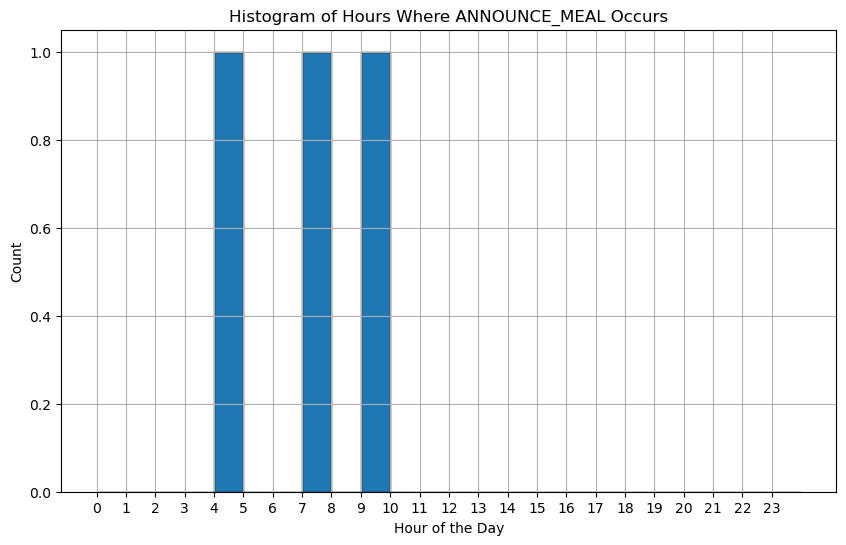

In [270]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_announce_meal_histogram(df):
    """
    Plot a histogram of the hours of the day where 'ANNOUNCE_MEAL' occurs.

    Parameters
    ----------
    df : pd.DataFrame
        The input DataFrame with columns 'msg_type' and a datetime index.

    Returns
    -------
    None
    """
    # Filter the DataFrame to include only 'ANNOUNCE_MEAL' events
    announce_meal_df = df[df['msg_type'] == 'ANNOUNCE_MEAL']

    # Extract the hour from the timestamp
    announce_meal_hours = announce_meal_df.index.hour

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(announce_meal_hours, bins=24, range=(0, 24), edgecolor='black')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Count')
    plt.title('Histogram of Hours Where ANNOUNCE_MEAL Occurs')
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.show()

# Example usage
data = {
    'msg_type': ['ANNOUNCE_MEAL', 'OTHER', 'OTHER', 'ANNOUNCE_MEAL', 'OTHER', 'ANNOUNCE_MEAL'],
    'food_g': [10, 5, 0, 20, 15, 25],
    'timestamp': pd.date_range(start='2023-01-01 04:00:00', periods=6, freq='H')
}
df = pd.DataFrame(data).set_index('timestamp')
plot_announce_meal_histogram(df)

/tmp/ipykernel_664607/2716443048.py:41: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'timestamp': pd.date_range(start='2023-01-01 04:00:00', periods=6, freq='H')


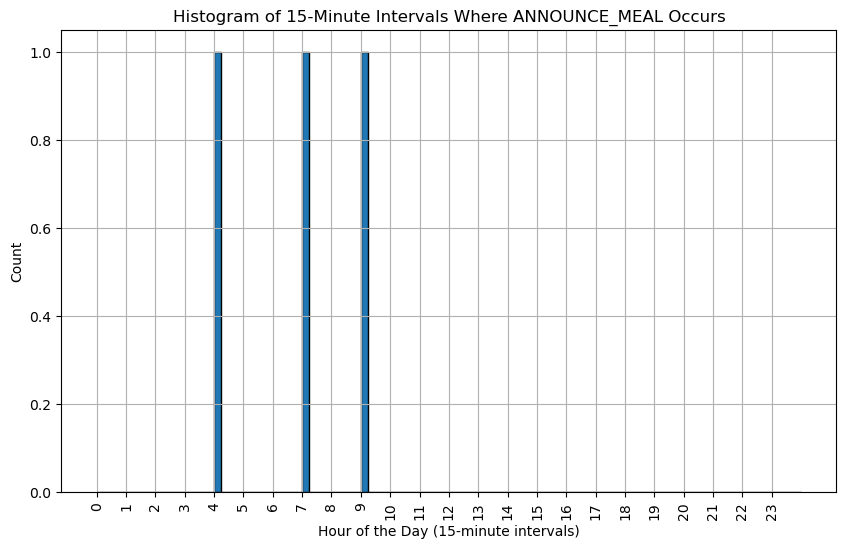

In [265]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_announce_meal_histogram(df):
    """
    Plot a histogram of the 15-minute intervals of the day where 'ANNOUNCE_MEAL' occurs.

    Parameters
    ----------
    df : pd.DataFrame
        The input DataFrame with columns 'msg_type' and a datetime index.

    Returns
    -------
    None
    """
    # Filter the DataFrame to include only 'ANNOUNCE_MEAL' events
    announce_meal_df = df[df['msg_type'] == 'ANNOUNCE_MEAL']

    # Extract the hour and minute from the timestamp
    announce_meal_hours = announce_meal_df.index.hour
    announce_meal_minutes = announce_meal_df.index.minute

    # Convert the hour and minute into a fractional hour to represent 15-minute intervals
    announce_meal_fractional_hours = announce_meal_hours + announce_meal_minutes / 60.0

    # Plot the histogram with 15-minute intervals (96 bins for 24 hours)
    plt.figure(figsize=(10, 6))
    plt.hist(announce_meal_fractional_hours, bins=96, range=(0, 24), edgecolor='black')
    plt.xlabel('Hour of the Day (15-minute intervals)')
    plt.ylabel('Count')
    plt.title('Histogram of 15-Minute Intervals Where ANNOUNCE_MEAL Occurs')
    plt.xticks([i/4 for i in range(0, 24*4) if i % 4 == 0], rotation=90)
    plt.grid(True)
    plt.show()

# Example usage
data = {
    'msg_type': ['ANNOUNCE_MEAL', 'OTHER', 'OTHER', 'ANNOUNCE_MEAL', 'OTHER', 'ANNOUNCE_MEAL'],
    'food_g': [10, 5, 0, 20, 15, 25],
    'timestamp': pd.date_range(start='2023-01-01 04:00:00', periods=6, freq='H')
}
df = pd.DataFrame(data).set_index('timestamp')
plot_announce_meal_histogram(df)

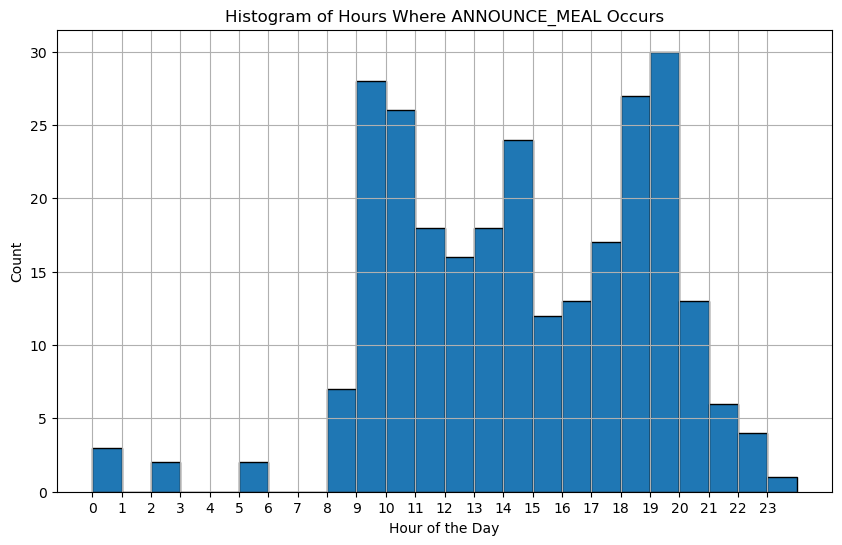

In [271]:
plot_announce_meal_histogram(result_df[0])

In [256]:
df50 = result_df[0]
len(df50[df50['msg_type'] == 'ANNOUNCE_MEAL'])

267

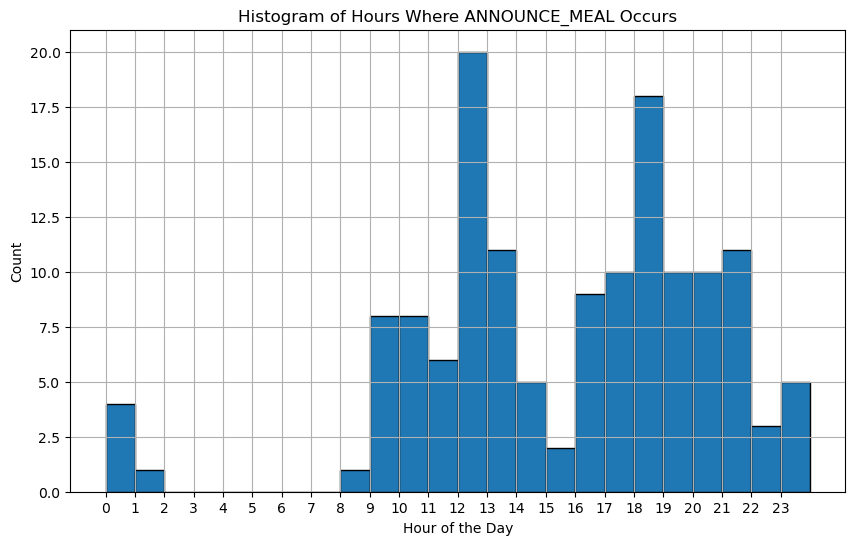

In [272]:
plot_announce_meal_histogram(result_df[1])

In [258]:
df67 = result_df[1]
len(df67[df67['msg_type'] == 'ANNOUNCE_MEAL'])

142